In [3]:
import numpy as np
import utils 

# Caricamento dei datasets

In [4]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

# Estrazione delle frequenze di campionamento e plot delle stesse

2000 200000
600 384000


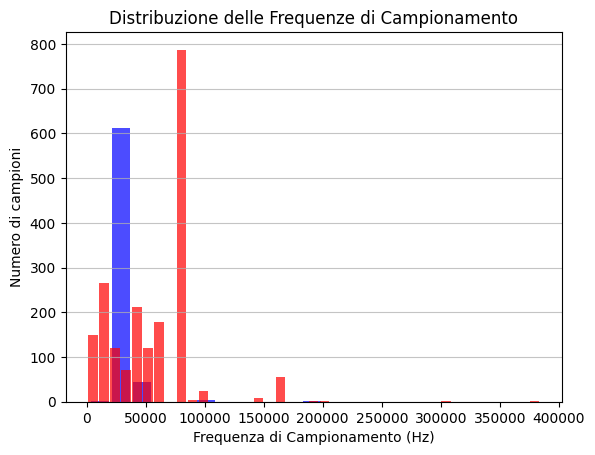

In [5]:
#TODO analisi per il resembling shannon Nyquist 
#TODO da modificare --> non prendere i duplicati 
frequenciesTarget = utils.extractFrequencies(audio_files_target)
frequenciesNonTarget = utils.extractFrequencies(audio_files_nonTarget)
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

Caricamento dataset nel dataframe

In [6]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [7]:
df_paths, df_names

(                                               FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise\2f574049-3325...
 ...                                                 ...
 2660  Dataset\Target\Vessel\SanctSound_OC01_03_ship_...
 2661  Dataset\Target\Vessel\SanctSound_OC02_01_ship_...
 2662  Dataset\Target\Vessel\SanctSound_OC03_02_ship_...
 2663  Dataset\Target\Vessel\SanctSound_SB03_09_vesse...
 2664               Dataset\Target\Vessel\ship_small.mp3
 
 [2665 rows x 1 columns],
                                             FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574

# Ricerca ed eliminazione dei duplicati

In [8]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [107, 213], '7202100T.wav': [108, 215], '7202100V.wav': [109, 216], '7202100Z.wav': [110, 217], '7702800U.wav': [958, 1565], '7702800V.wav': [959, 1566], '7702800X.wav': [960, 1567], '7702801F.wav': [966, 1568], '7702801M.wav': [969, 1569], '78018002.wav': [112, 218], '78018003.wav': [113, 219], '7801800B.wav': [115, 220], '7801800D.wav': [116, 221], '7801800H.wav': [117, 222], '7801800J.wav': [118, 223], '84016002.wav': [1465, 1577], '8401600B.wav': [1466, 1578], '84021003.wav': [1234, 1581], '91012009.wav': [1002, 1605], '9101200B.wav': [1003, 1606], '9101200K.wav': [1006, 1607], '9101201E.wav': [1011, 1608], '91012022.wav': [1017, 1609], '91012048.wav': [1046, 1610], '91012049.wav': [1047, 1611]}


Salvataggio del dizionario in un file json

In [9]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

# Eliminazione duplicati

In [10]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [11]:
df_names, df_paths

(                                            FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3
 ...                                              ...
 2660    SanctSound_OC01_03_ship_20191106T223751Z.wav
 2661    SanctSound_OC02_01_ship_20190419T233040Z.wav
 2662    SanctSound_OC03_02_ship_20200228T080107Z.wav
 2663  SanctSound_SB03_09_vessel_20200415T161235Z.wav
 2664                                  ship_small.mp3
 
 [2638 rows x 1 columns],
                                                FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise

In [12]:
#TODO dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
# TODO Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

# Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [13]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [14]:
audio_durations

[31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 20.0,
 9.99297052154195,
 8.668526077097505,
 10.29297052154195,
 9.993015873015873,
 19.993015873015874,
 37.24267573696145,
 5.0,
 11.00625850340136,
 3.527995444191344,
 3.527995444191344,
 3.527995444191344,
 1.763986332574032,
 1.763986332574032,
 1.763986332574032,
 3.527995444191344,
 2.646013667425968,
 3.527995444191344,
 1.2227062706270626,
 1.5207920792079208,
 1.2324752475247525,
 1.116831683168317,
 1.1664686468646865,
 1.4574257425742574,
 1.0967656765676568,
 1.7937293729372936,
 1.4621782178217821,
 0.8645544554455445,
 0.9821782178217822,
 1.8723267326732673,
 1.33016501650165,
 1.3526072607260726,
 1.451089108910891,
 58.62316831683168,
 1.9211875,
 1.7978125,
 1.6121875,
 1.665125,
 1.682425,
 1.551,
 1.3395,
 1.4241,
 1.5369,
 1.2408,
 1.5792,
 1.4382,
 1.7907,
 1.692,
 1.2549,
 1.1421,
 1.4946,
 1.3677,
 1.3959,
 1.6074,
 1.5087,
 1.3959,
 1.3113,
 1.4382,
 1.2

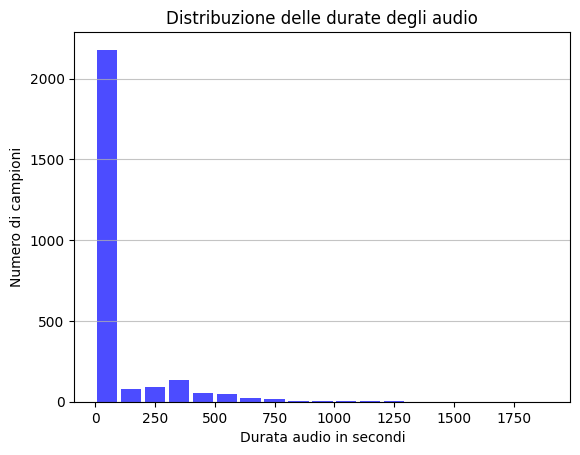

In [15]:
utils.plot_durations(audio_durations)

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore

# Analisi delle frequenze

In [16]:
audio_files = utils.get_audio_files('Dataset/df_paths.csv')

Promemoria: gli audio troppo corti sono stati saltati. va bene come cosa? 

Skipping Dataset\Non-Target\Minke Whale\64103001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103002.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103003.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103004.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103005.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103006.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103007.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103008.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103009.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300A.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300B.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104002.wav because it's too short
Skipping Dat

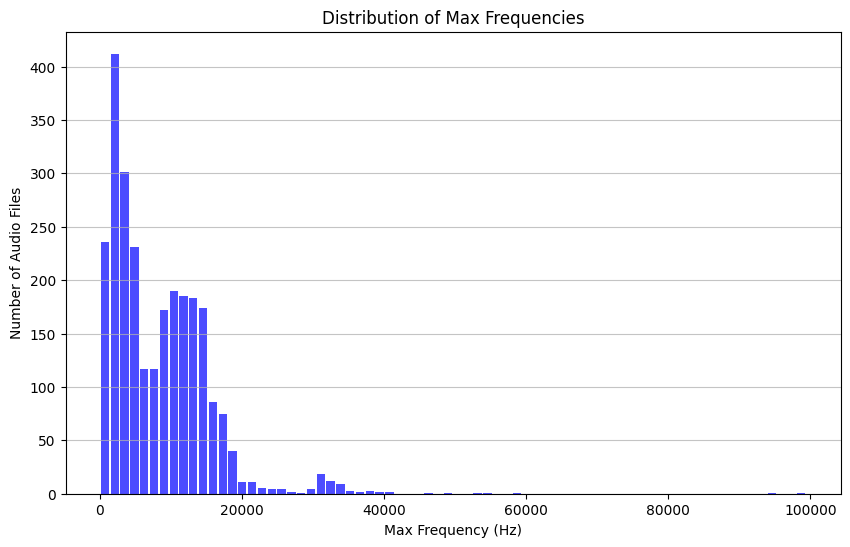

In [17]:
max_frequencies = utils.analyze_max_frequencies(audio_files)
utils.plot_max_frequencies(max_frequencies)

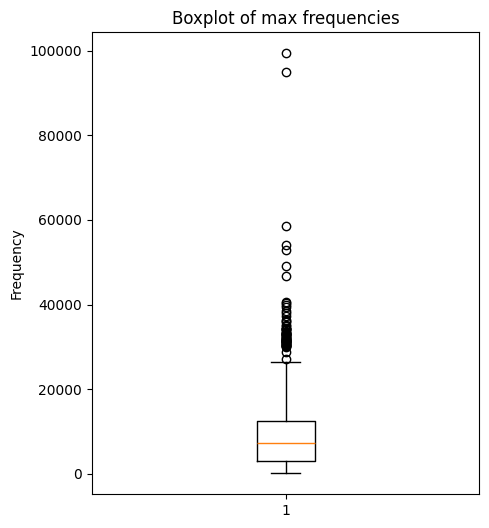

In [18]:
utils.boxplot_max_frequencies(max_frequencies)

Files with 2 channels:
Dataset\Non-Target\Atlantic croaker\Croaker.wav
Dataset\Non-Target\Bar jack\Bar-Jack.wav
Dataset\Non-Target\Barred Grunt\Barred-Grunt.wav
Dataset\Non-Target\Bearded Seal\Bearded_Seal.wav
Dataset\Non-Target\Beluga, White Whale\BelugasHunting.wav
Dataset\Non-Target\Black Drum\Black-Drum.wav
Dataset\Non-Target\Bowhead Whale\BowheadWhale.wav
Dataset\Non-Target\Cuvier's beaked whale\Beaked-Whale-3.wav
Dataset\Non-Target\Cuvier's beaked whale\Beaked-Whale-Buzz-2.wav
Dataset\Non-Target\Dolphin\StenellaBlueDolphin.wav
Dataset\Non-Target\Earthquake\earthquake_sound (1).mp3
Dataset\Non-Target\Fin, Finback Whale\atlfin.mp3
Dataset\Non-Target\Gray whale\GreyWhale.wav
Dataset\Non-Target\Harbor Seals\harbor-seal-in-air.wav
Dataset\Non-Target\Harbor Seals\harborseal-underwater.wav
Dataset\Non-Target\Humpback Whale\akhumphi1x.mp3
Dataset\Non-Target\Humpback Whale\Humpback-Calf-whispering-Peer-Madsen.wav
Dataset\Non-Target\Humpback Whale\Humpback.wav
Dataset\Non-Target\Killer Wha

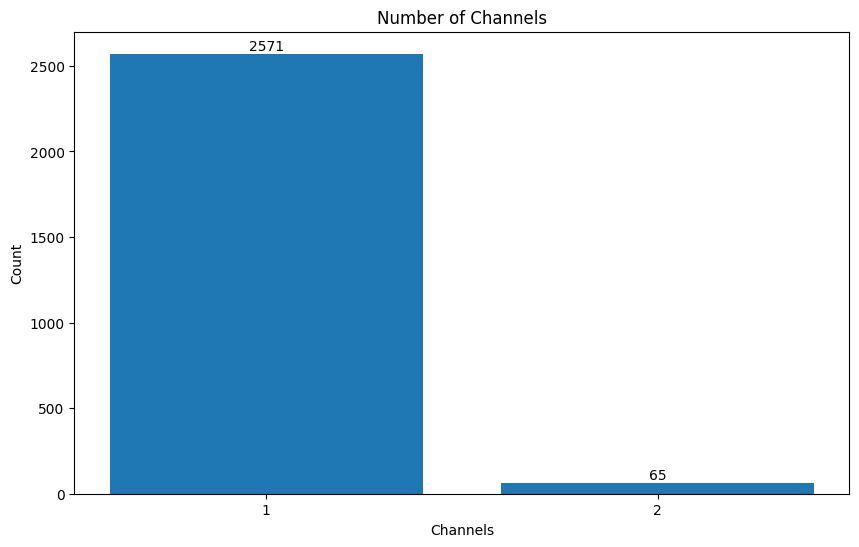

In [19]:
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

# Analisi dei Bit Depth

Could not process file Dataset\Non-Target\Dwarf Sperm Whale\burst-pulse-DSW_bullfrog-click-train.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\click-trains-DSW_tic-tocs-and-clicks.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\clicks-and-whistles-DSW_Rattelsnake-click-train.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\DSW_whistles-and-rattles.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\multipart-stepping-tonal-DSW_downsweep-rattle.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\xzoom-whistle-2-DSW_whistles-and-slow-click-train.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_clicks-and-wolf-whistle.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_down-sweep.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_up-sweeps.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelph

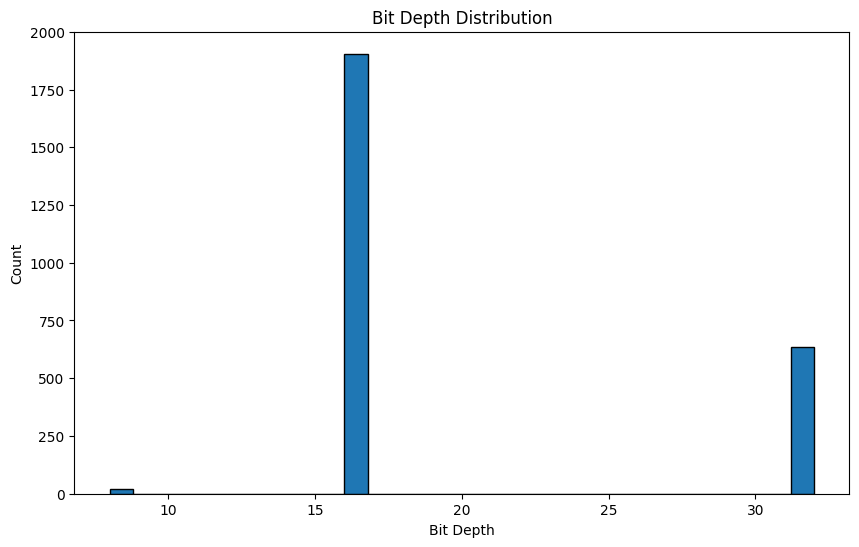

In [24]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import os

def analyze_and_plot_bit_depth(audio_files):
    bit_depths = []
    for file in audio_files:
        if file.lower().endswith('.mp3'):  # Ignora i file .mp3
            continue
        try:
            audio = AudioSegment.from_file(file)
            bit_depth = audio.sample_width * 8  # Convert sample width to bit depth
            bit_depths.append(bit_depth)
        except:
            print(f"Could not process file {file}")
            continue

    # Crea un plot a barre della distribuzione delle bit depth
    plt.figure(figsize=(10, 6))
    plt.hist(bit_depths, bins=30, edgecolor='black')
    plt.xlabel('Bit Depth')
    plt.ylabel('Count')
    plt.title('Bit Depth Distribution')
    plt.show()

# Utilizzo della funzione
audio_files = utils.get_audio_files('Dataset/df_paths.csv')
analyze_and_plot_bit_depth(audio_files)

# Analisi sulla distribuzione delle classi

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_class_distribution(df, class_column):
    # Calcola la distribuzione delle classi
    class_distribution = df[class_column].value_counts()

    # Crea un plot a barre della distribuzione delle classi
    plt.figure(figsize=(30, 10))
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()


In [43]:
import pandas as pd
import os

# Carica il DataFrame da df_paths.csv
df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_paths_copy = df_paths.copy()

# Estrai la classe e il target dai percorsi dei file
df_paths_copy['class'] = df_paths_copy['path'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_paths_copy['target'] = df_paths_copy['path'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Ora il DataFrame df_paths_copy contiene le nuove colonne 'class' e 'target'

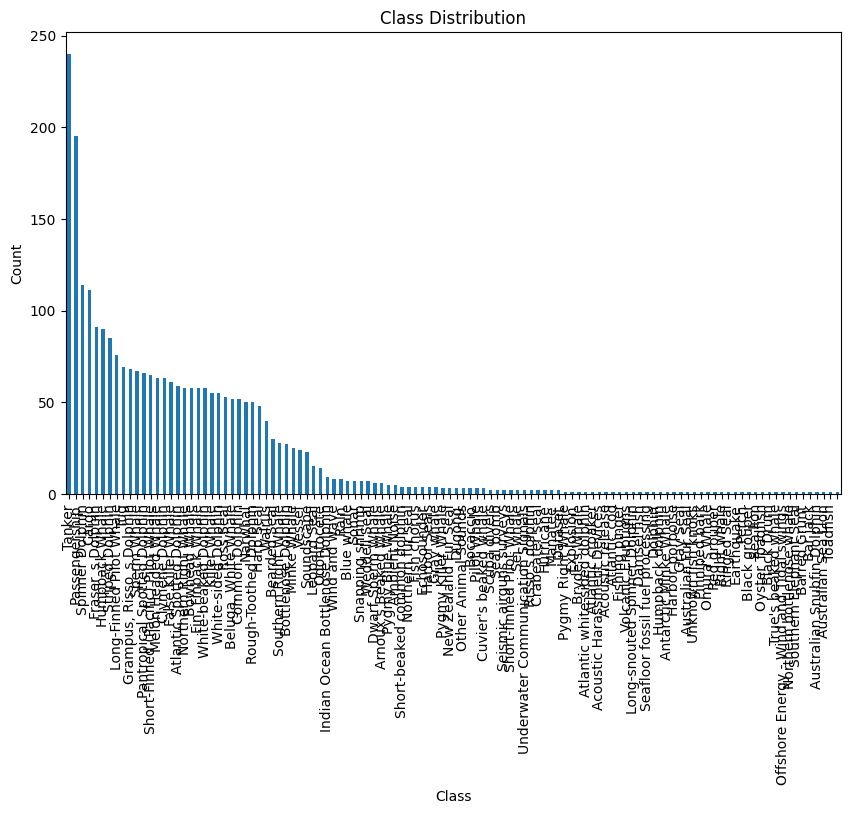

In [44]:
plot_class_distribution(df_paths_copy, 'class')